In [42]:
import pandas as pd
import numpy as np
from utilities import loadPickle
import torch

In [47]:
x = torch.Tensor(np.random.rand(3, 60, 2))

In [17]:
y = x.reshape((60,6))

In [62]:
df_detect = loadPickle(r"C:\Users\irdal\OneDrive\Desktop\ResearchProgrms\RoleDetectionsModels\df_updated.pth.tar")

In [65]:
df_detect_train = loadPickle(r"C:\Users\irdal\OneDrive\Desktop\ResearchProgrms\RoleDetectionsModels\ExcelRefferedModels\Combined\LSTMModel\X_test.pth.tar")

In [68]:
df_detect_train[0]

array([ 7.79086514e+00,  9.24563514e+00,  6.49942220e+00,  4.94569186e+00,
        2.73247912e+00,  1.32977421e+00,  5.48324278e-01,  1.70954095e-01,
       -7.83899084e-01, -2.65667239e+00, -5.61027319e+00, -1.38039427e+01,
       -1.85084934e+01, -2.30451579e+01, -3.12698553e+01, -3.01373168e+01,
       -2.90603544e+01, -2.77251736e+01, -2.64698043e+01, -2.50019142e+01,
       -2.39313019e+01, -2.27519716e+01, -2.20871934e+01, -2.18771399e+01,
       -2.18195559e+01, -2.19722089e+01, -2.22896214e+01, -2.21861564e+01,
       -2.21039768e+01, -2.16074811e+01, -2.11964515e+01, -2.10240158e+01,
       -2.07881570e+01, -2.07543936e+01, -2.09523087e+01, -2.09368803e+01,
       -2.08732978e+01, -2.06129018e+01, -2.03714435e+01, -2.00704675e+01,
       -2.00211536e+01, -2.00398401e+01, -1.99893164e+01, -1.99394421e+01,
       -1.99582470e+01, -1.97525207e+01, -1.97328832e+01, -1.97804735e+01,
       -1.97869608e+01, -2.00041508e+01, -2.05241978e+01, -2.09079019e+01,
       -2.09053516e+01, -

In [70]:
data = loadPickle('./win1_f2.pth.tar')

In [71]:
data.head()

,index,Gaze,Pose,CR1,CR2,CR3,NR1,NR2,NR3,Encoded Future Roles,Encoded Current Roles
0,30,"[[[0.24177521529034152, -0.3134342682524349], ...","[[[[ 0.45254925 0.42612234 -0.33671436], [ 0....",MS,SL,ML,MS,SL,ML,"[1, 0, 0, 0, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0]"
1,31,"[[[0.43087098476479013, -0.4854883671283492], ...","[[[[ 0.429539 0.57740897 -0.4288066 ], [ 0....",SL,ML,MS,SL,ML,MS,"[0, 0, 1, 0, 1, 0, 1, 0, 0]","[0, 0, 1, 0, 1, 0, 1, 0, 0]"
2,32,"[[[0.24177521529034152, -0.3134342682524349], ...","[[[[ 0.41020083 0.50260216 -0.44118774], [ 0....",ML,MS,SL,ML,MS,SL,"[0, 1, 0, 1, 0, 0, 0, 0, 1]","[0, 1, 0, 1, 0, 0, 0, 0, 1]"
3,39,"[[[-0.2639596582559413, -0.037234653211187935]...","[[[[ 0.46997508 0.43137866 -0.35136455], [ 0....",MS,ML,SL,MS,ML,SL,"[1, 0, 0, 0, 1, 0, 0, 0, 1]","[1, 0, 0, 0, 1, 0, 0, 0, 1]"
4,40,"[[[0.2989198887246276, -0.021647870768442788],...","[[[[ 0.42280433 0.57267028 -0.43221694], [ 0....",ML,SL,MS,ML,SL,MS,"[0, 1, 0, 0, 0, 1, 1, 0, 0]","[0, 1, 0, 0, 0, 1, 1, 0, 0]"


In [76]:
data['Gaze'] = data['Gaze'].apply(lambda x: np.rad2deg(x))

In [78]:
data['Pose'] = data['Pose'].apply(lambda x: np.rad2deg(x))

In [81]:
x.shape

(3, 30, 2)

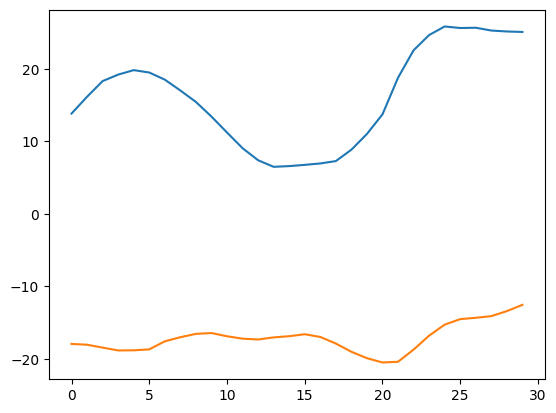

In [83]:
from matplotlib import pyplot as plt


plt.plot(x[0])

In [87]:
x[0][:,0]

array([13.85269943, 16.17228983, 18.33788477, 19.23187169, 19.85049756,
       19.52098463, 18.53587756, 17.03939893, 15.45897475, 13.43630513,
       11.23785679,  9.07362852,  7.40628981,  6.49798112,  6.5984532 ,
        6.76974329,  6.96466807,  7.29123852,  8.86344793, 11.03699633,
       13.74576564, 18.80592302, 22.59366766, 24.69755712, 25.87908778,
       25.66582461, 25.70431156, 25.31806856, 25.18823704, 25.12244399])

CR1    MS
CR2    SL
CR3    ML
Name: 0, dtype: object


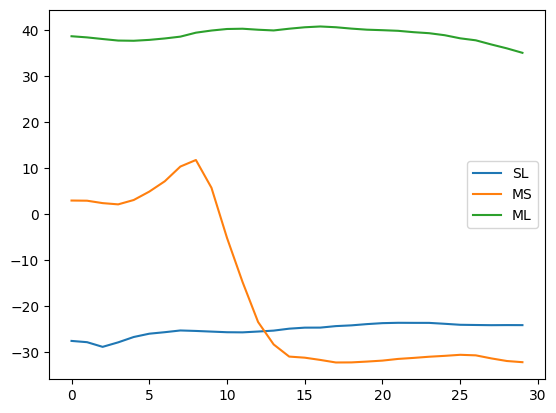

In [103]:
t = 100
x = data['Gaze'].loc[t]
plt.plot(x[0][:, 0])
plt.plot(x[1][:, 0])
plt.plot(x[2][:, 0])
plt.legend(data.iloc[t]['CR1':'CR3'])
print(data.iloc[0]['CR1':'CR3'])

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [121]:
def fixLabels(x:str):
    if 'MS' in x:
        return 'MS'
    elif 'ML' in x:
        return 'ML'
    elif 'SL' in x:
        return 'SL'
    else:
        return np.nan
data['cr1'] = data['CR1'].apply(lambda x: fixLabels(x))
data['cr2'] = data['CR2'].apply(lambda x: fixLabels(x))
data['cr3'] = data['CR3'].apply(lambda x: fixLabels(x))

In [259]:
df = loadPickle('abc.pth.tar')

In [263]:
df.dropna(inplace=True)

In [265]:
# Assuming df is your DataFrame
# Step 1: Data Preprocessing
X = df['Gaze'].to_numpy()
y = df['Current Role'].to_numpy()

array([array([], shape=(3, 0, 3), dtype=float64),
       array([[[ 5.1938450e-01, -1.0722049e-01, -8.4778744e-01],
               [ 5.1584446e-01, -1.1066632e-01, -8.4950430e-01],
               [ 5.1930800e-01, -1.2915456e-01, -8.4477120e-01],
               [ 5.1809850e-01, -1.6326322e-01, -8.3959460e-01],
               [ 5.1888310e-01, -2.0549838e-01, -8.2977760e-01],
               [ 5.3005403e-01, -2.4832594e-01, -8.1078786e-01],
               [ 5.3879580e-01, -2.8728282e-01, -7.9193920e-01],
               [ 5.4831920e-01, -3.0000076e-01, -7.8060590e-01],
               [ 5.5213207e-01, -3.0780777e-01, -7.7485776e-01],
               [ 5.3744656e-01, -2.4125028e-01, -8.0805290e-01],
               [ 5.3170663e-01, -2.0199656e-01, -8.2248730e-01],
               [ 5.3262424e-01, -1.8184192e-01, -8.2658630e-01],
               [ 5.3653336e-01, -1.6330601e-01, -8.2792705e-01],
               [ 5.4025084e-01, -1.5746294e-01, -8.2664055e-01],
               [ 5.4219866e-01, -1.54249

In [266]:
# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)

In [267]:

# Step 4: Model Architecture
class GazePredictionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GazePredictionModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out
    
class customDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        gaze = self.X[index]
        gaze = [x[0][:,0], x[0][:,1], x[1][:,0], x[1][:,1], x[2][:,0], x[2][:,1]]
        gaze = torch.FloatTensor(gaze).transpose(0,1)
        label = torch.FloatTensor(self.y[index])
        return (gaze, label)

In [275]:

input_size = 6  # Assuming 6 features in your gaze data
hidden_size = 128
output_size = 3  # Number of roles

model = GazePredictionModel(input_size, hidden_size, output_size).cuda()

# Step 5: Model Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [276]:
train_dataset = customDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle = True)
test_dataset = customDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16)

In [277]:

model.train()
epochs = 10
for epoch in range(epochs):
    for i,(inputs, labels) in enumerate(train_loader):
        inputs = inputs.cuda()
        labels = labels.cuda()
        #print(inputs.shape)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels[:, 0:3])
        loss.backward()
        optimizer.step()
        if i%100 == 0:
            print(f"epoch: {epoch}, loss:{loss.item()}")


epoch: 0, loss:1.0928502082824707
epoch: 0, loss:1.0861337184906006
epoch: 0, loss:1.106709599494934
epoch: 1, loss:1.0997369289398193
epoch: 1, loss:1.0996055603027344
epoch: 1, loss:1.1049377918243408
epoch: 2, loss:1.0842537879943848
epoch: 2, loss:1.0857882499694824
epoch: 2, loss:1.067192792892456
epoch: 3, loss:1.069058895111084
epoch: 3, loss:1.1166342496871948
epoch: 3, loss:1.107790231704712
epoch: 4, loss:1.0437955856323242
epoch: 4, loss:1.1040258407592773
epoch: 4, loss:1.0810726881027222
epoch: 5, loss:1.061806321144104
epoch: 5, loss:1.0871267318725586
epoch: 5, loss:1.0826514959335327
epoch: 6, loss:1.0634534358978271
epoch: 6, loss:1.101243019104004
epoch: 6, loss:1.0999642610549927
epoch: 7, loss:1.1153810024261475
epoch: 7, loss:1.1048272848129272
epoch: 7, loss:1.061718225479126
epoch: 8, loss:1.0849040746688843
epoch: 8, loss:1.1028003692626953
epoch: 8, loss:1.0841933488845825
epoch: 9, loss:1.0682555437088013
epoch: 9, loss:1.1022679805755615
epoch: 9, loss:1.0814

In [278]:

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, labels = torch.max(labels[:, 0:3], 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.3485915492957746
